In [1]:
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
DG = nx.DiGraph()
DG.add_edge('ETH', 'USDT', weight=3000)
DG.add_edge('BTC', 'USDT', weight=43000)
DG.add_edge('ETH', 'BTC', weight=0.0686)

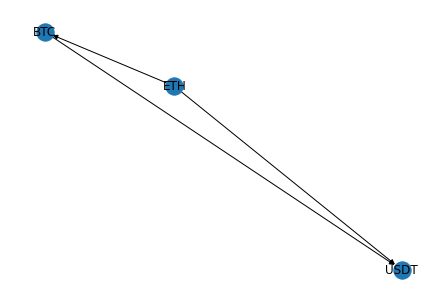

In [3]:
nx.draw(DG, with_labels=True)

In [4]:
import requests

response = requests.get('https://api.binance.com/api/v3/exchangeInfo')

data = response.json()

In [5]:
trading_symbols = [symbol for symbol in data['symbols'] if symbol['status'] == 'TRADING']

In [28]:
trading_symbols[0].keys()

dict_keys(['symbol', 'status', 'baseAsset', 'baseAssetPrecision', 'quoteAsset', 'quotePrecision', 'quoteAssetPrecision', 'baseCommissionPrecision', 'quoteCommissionPrecision', 'orderTypes', 'icebergAllowed', 'ocoAllowed', 'quoteOrderQtyMarketAllowed', 'isSpotTradingAllowed', 'isMarginTradingAllowed', 'filters', 'permissions'])

In [30]:
import csv

with open('symbols.csv', 'w', newline='') as csv_file:
    writer = csv.DictWriter(csv_file, fieldnames=['symbol', 'status', 'baseAsset', 'baseAssetPrecision', 'quoteAsset', 'quotePrecision', 'quoteAssetPrecision', 'baseCommissionPrecision', 'quoteCommissionPrecision', 'orderTypes', 'icebergAllowed', 'ocoAllowed', 'quoteOrderQtyMarketAllowed', 'isSpotTradingAllowed', 'isMarginTradingAllowed', 'filters', 'permissions'])
    for symbol in data['symbols']:
        writer.writerow(symbol)

In [7]:
G = nx.Graph()
for symbol in trading_symbols:
  G.add_edge(symbol['baseAsset'], symbol['quoteAsset'])

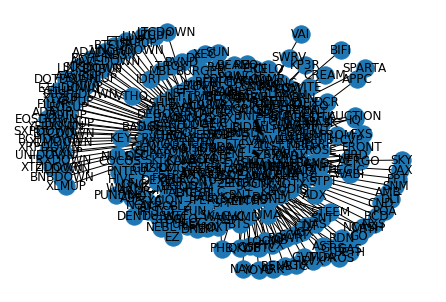

In [8]:
nx.draw(G, with_labels=True)

In [9]:
G

In [24]:
paths = nx.algorithms.simple_paths.shortest_simple_paths(G, 'ETH', 'LINK')

In [25]:
for p in paths:
  if len(p) > 3:
    break
  print(p)

['ETH', 'LINK']
['ETH', 'BTC', 'LINK']
['ETH', 'USDT', 'LINK']
['ETH', 'USDC', 'LINK']
['ETH', 'BUSD', 'LINK']
['ETH', 'AUD', 'LINK']
['ETH', 'TRY', 'LINK']
['ETH', 'EUR', 'LINK']
['ETH', 'BRL', 'LINK']
['ETH', 'GBP', 'LINK']
